## Alphabets - Spatial Filtering and Character Recognition

In [1]:
import numpy as np
from diffractio import mm, um, degrees
from diffractio.scalar_sources_XY import Scalar_source_XY
from diffractio.scalar_masks_XY import Scalar_mask_XY


# Setting up
length = 1 * mm
num_data = 512
x0 = np.linspace(-length / 2, length / 2, num_data)
y0 = np.linspace(-length / 2, length / 2, num_data)
wavelength = 0.633 * um

number of processors: 12


## Setting up source
- Gaussian Beam (LASER)

((<matplotlib.image.AxesImage at 0x218cbf0da60>,
  <matplotlib.image.AxesImage at 0x218cc1ad220>),
 None,
 None)

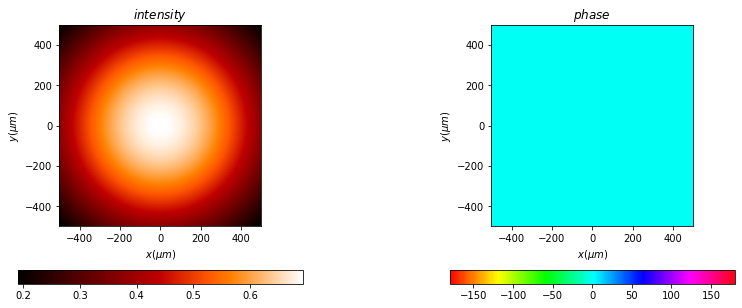

In [2]:
# Gaussian Beam Source - like a LASER
u0 = Scalar_source_XY(x=x0, y=y0, wavelength=wavelength)
u0.gauss_beam(r0=(0, 0), w0=(800 * um, 800 * um), z0=0.0)
u0.draw(kind='field', logarithm=True)

## E & F

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x218cca87dc0>)

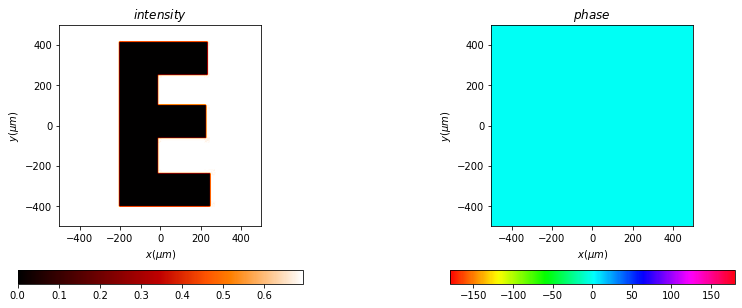

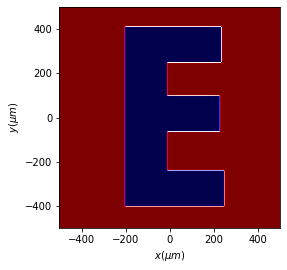

In [3]:
E = Scalar_mask_XY(x0, y0, wavelength)
E.image(
    filename="E.png",
    normalize=True,
    canal=0,
)

E.draw(kind='field', logarithm=True)
E.draw(kind='real_field', logarithm=True)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='$x  (\\mu m)$', ylabel='$y  (\\mu m)$'>,
 <matplotlib.image.AxesImage at 0x218cd0785b0>)

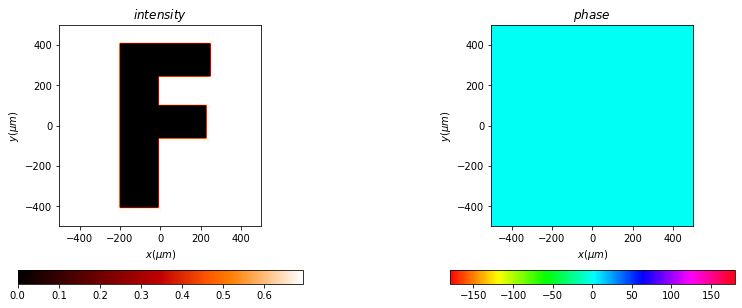

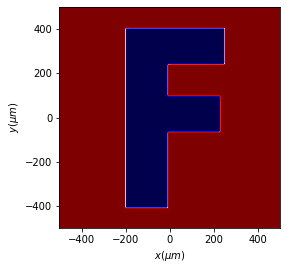

In [4]:
F = Scalar_mask_XY(x0, y0, wavelength)
F.image(
    filename="F.png",
    normalize=True,
    canal=0,
)

F.draw(kind='field', logarithm=True)
F.draw(kind='real_field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d0d64190>,
  <matplotlib.image.AxesImage at 0x218d0e0e910>),
 None,
 None)

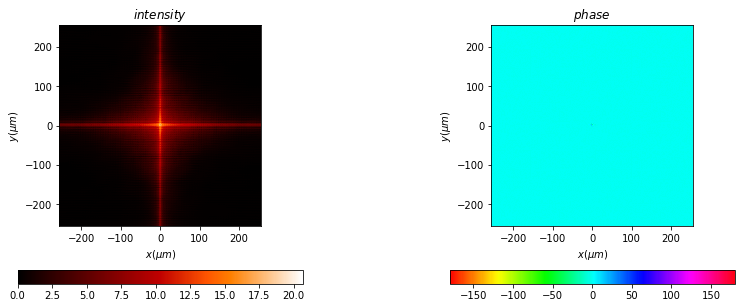

In [5]:
# Fourier Plane - No Filter
E_a_L1 = (u0 * E).fft(z=1 * mm, new_field=True)
E_a_L1.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d0d9ac10>,
  <matplotlib.image.AxesImage at 0x218cd043400>),
 None,
 None)

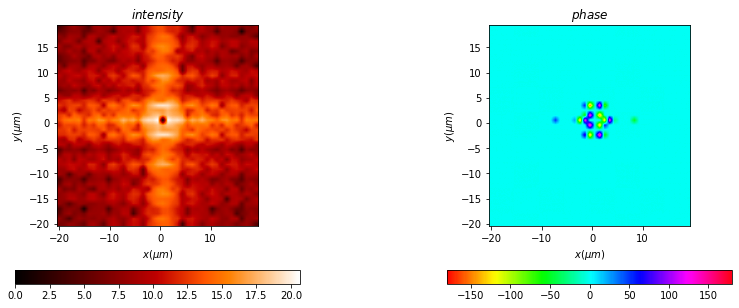

In [6]:
# A closer look
E_a_L1_Crop = E_a_L1.cut_resample(x_limits=(-20, 20), y_limits=(-20, 20), new_field=True)
E_a_L1_Crop.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d0e9a940>,
  <matplotlib.image.AxesImage at 0x218ccb75520>),
 None,
 None)

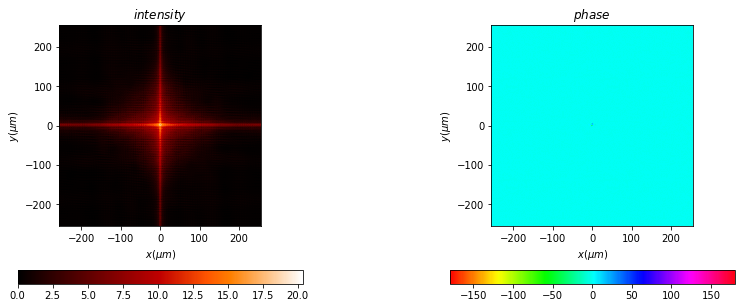

In [7]:
# Fourier Plane - No Filter
F_a_L1 = (u0 * F).fft(z=1 * mm, new_field=True)
F_a_L1.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218ccbc7fa0>,
  <matplotlib.image.AxesImage at 0x218d0f32730>),
 None,
 None)

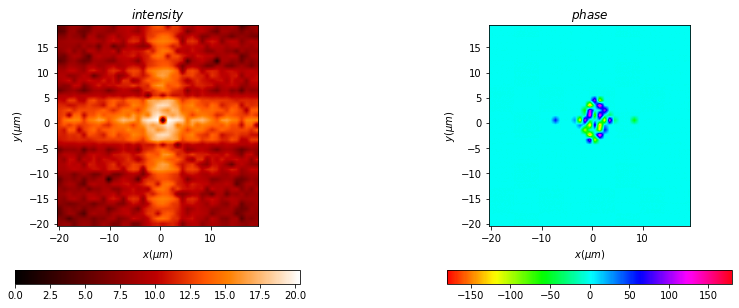

In [8]:
# A closer look
F_a_L1_Crop = F_a_L1.cut_resample(x_limits=(-20, 20), y_limits=(-20, 20), new_field=True)
F_a_L1_Crop.draw(kind='field', logarithm=True)

#### So, the difference in the Fourier encoding for two very similar characters or alphabets lies not so much in the position-space, as it does in the phase-space. This "hidden" phase-space information can be used to enable better machine encodings for Character Recognition software.

((<matplotlib.image.AxesImage at 0x218d0bf7130>,
  <matplotlib.image.AxesImage at 0x218d0c8c370>),
 None,
 None)

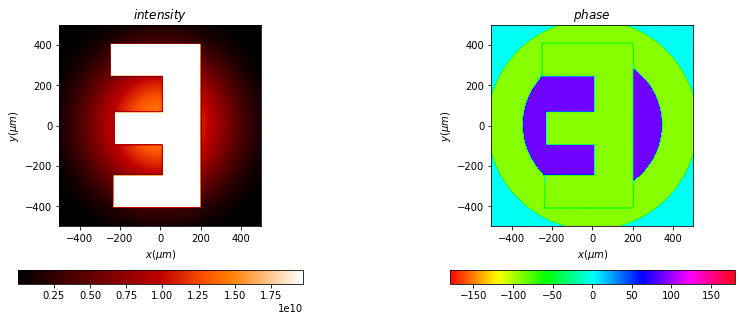

In [9]:
# This is how, it'd look without any filter, at the Observation screen
E_a_L2 = E_a_L1.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
E_a_L2.draw(kind='field', logarithm=False)

((<matplotlib.image.AxesImage at 0x218d15767f0>,
  <matplotlib.image.AxesImage at 0x218d1604a60>),
 None,
 None)

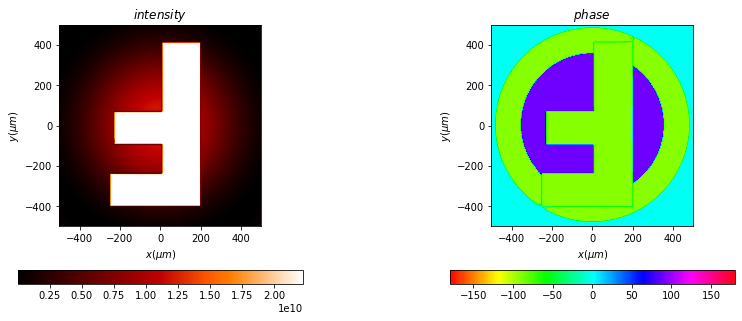

In [10]:
# This is how, it'd look without any filter, at the Observation screen
F_a_L2 = F_a_L1.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
F_a_L2.draw(kind='field', logarithm=False)

## Some Masks / Filters
- Center Dot - High Pass
- Square - Low Pass
- Square + Center Dot -

- Vertical Slit
- Horizontal Slit
- Angled Slit
- Variable Slits

- Mesh

((<matplotlib.image.AxesImage at 0x218d15a4190>,
  <matplotlib.image.AxesImage at 0x218d0dc1100>),
 None,
 None)

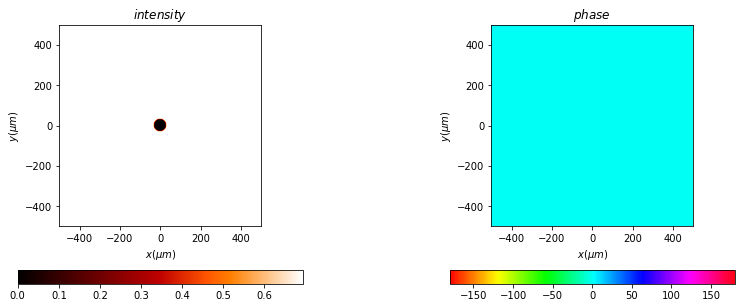

In [11]:
cDot = Scalar_mask_XY(x0, y0, wavelength)
cDot.ring(
    r0=(0 * um, 0 * um),
    radius1=(30 * um, 30 * um),
    radius2=(1000 * um, 1000 * um)
)
cDot.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d1fbb910>,
  <matplotlib.image.AxesImage at 0x218d20430d0>),
 None,
 None)

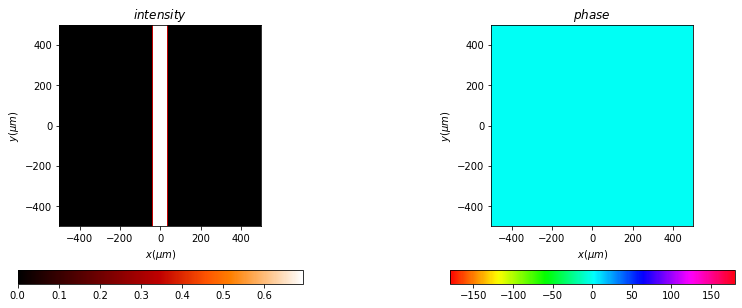

In [12]:
vert = Scalar_mask_XY(x0, y0, wavelength)
vert.slit(
    x0=0 * um,
    size=75 * um
)
vert.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d2108370>,
  <matplotlib.image.AxesImage at 0x218d2184b50>),
 None,
 None)

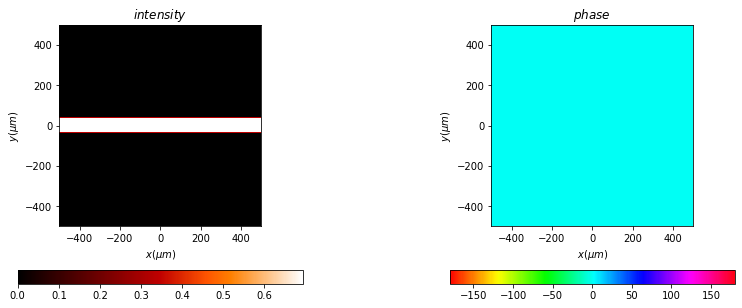

In [13]:
horiz = Scalar_mask_XY(x0, y0, wavelength)
horiz.slit(
    x0=0 * um,
    size=75 * um,
    angle=np.pi / 2
)
horiz.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d30abdf0>,
  <matplotlib.image.AxesImage at 0x218d312d5e0>),
 None,
 None)

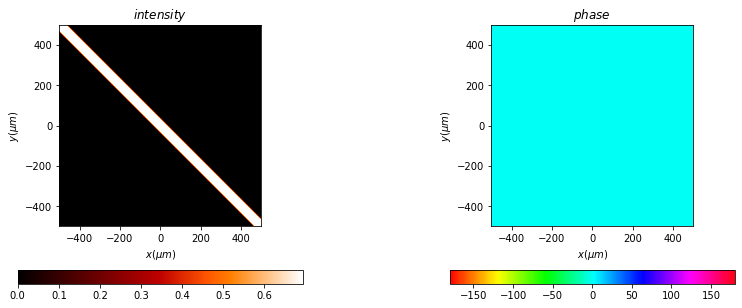

In [14]:
angled = Scalar_mask_XY(x0, y0, wavelength)
angled.slit(
    x0=0 * um,
    size=50 * um,
    angle=np.pi / 4
)
angled.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d31d6ca0>,
  <matplotlib.image.AxesImage at 0x218d4aeef70>),
 None,
 None)

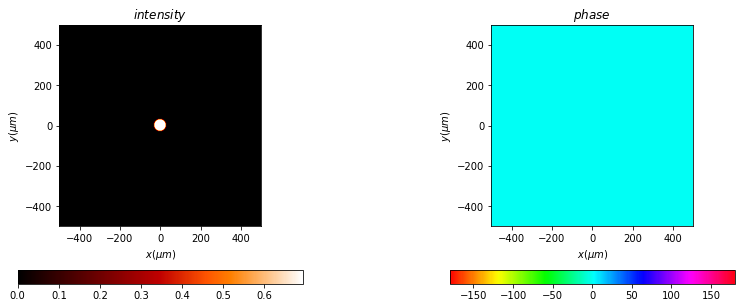

In [15]:
circ = Scalar_mask_XY(x0, y0, wavelength)
circ.circle(
    r0=(0 * um, 0 * um),
    radius=(30 * um, 30 * um),
    angle=0
)
circ.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d4ba1520>,
  <matplotlib.image.AxesImage at 0x218d4c357c0>),
 None,
 None)

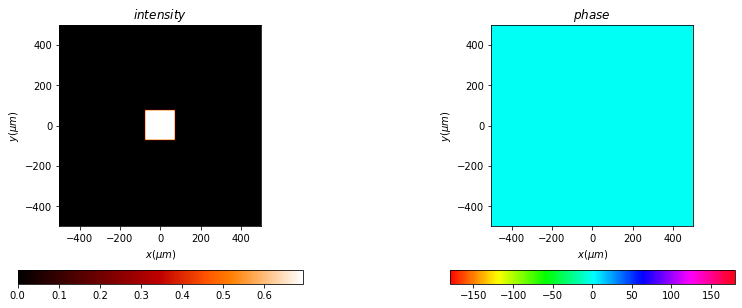

In [16]:
sq = Scalar_mask_XY(x0, y0, wavelength)
sq.square(
    r0=(0 * um, 0 * um),
    size=(150 * um, 150 * um),
    angle=0,
)
sq.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218d4bb70d0>,
  <matplotlib.image.AxesImage at 0x218d17567f0>),
 None,
 None)

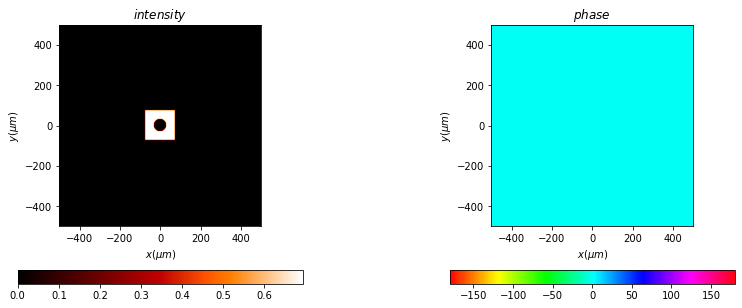

In [17]:
# Adding two filters
sqCirc = sq * cDot
sqCirc.draw(kind="field", logarithm=True)

## Returns wave after encountering filter and then L2

In [18]:
def sim(a_L1, mask):
    """
    a_L1: Wave after passing through Lens 1
    mask: Mask or Filter to apply

    """
    a_L1_Mask = a_L1 * mask
    a_L1_Mask_L2 = a_L1_Mask.fft(z=1 * mm, shift=False, remove0=False, new_field=True)
    
    return a_L1_Mask, a_L1_Mask_L2

### Center Dot - High Pass - HT Structure Visible - Dark-Field Illumination / Edge Enhancement

((<matplotlib.image.AxesImage at 0x218d5f0c7c0>,
  <matplotlib.image.AxesImage at 0x218d7787f40>),
 None,
 None)

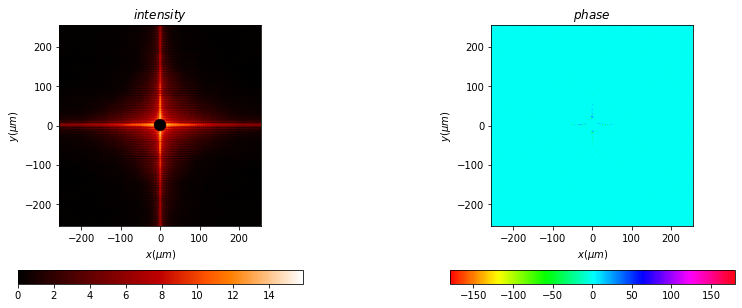

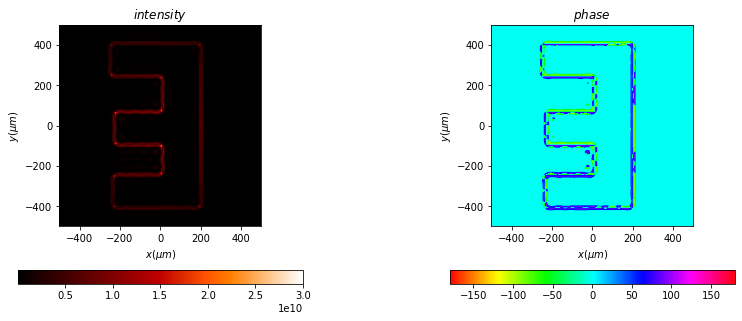

In [19]:
E_a_L1_cD, E_a_L1_cD_L2 = sim(E_a_L1, cDot)
E_a_L1_cD.draw(kind='field', logarithm=True)
E_a_L1_cD_L2.draw(kind='field', logarithm=False)

### Circle - Low Pass - Blurred Output

((<matplotlib.image.AxesImage at 0x218d8423370>,
  <matplotlib.image.AxesImage at 0x218d848e5e0>),
 None,
 None)

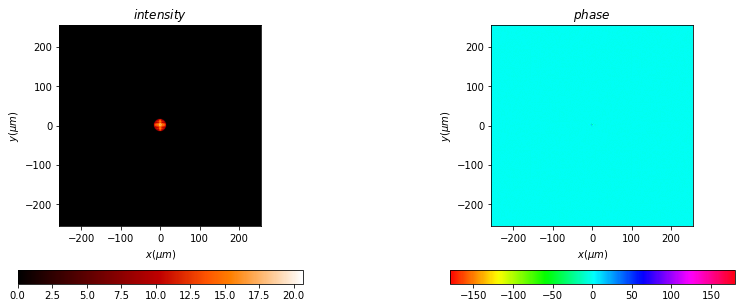

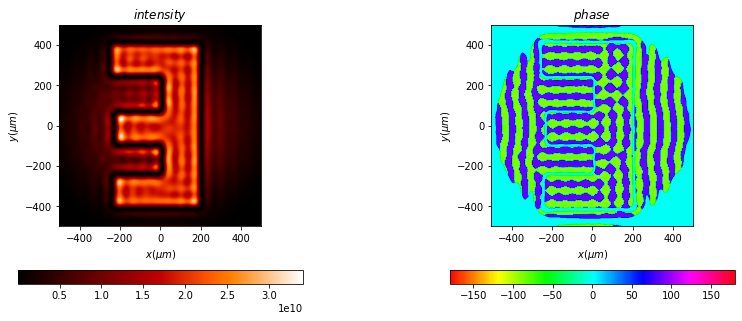

In [20]:
E_a_L1_Circ, E_a_L1_Circ_L2 = sim(E_a_L1, circ)
E_a_L1_Circ.draw(kind='field', logarithm=True)
E_a_L1_Circ_L2.draw(kind='field', logarithm=False)

### Square

((<matplotlib.image.AxesImage at 0x218d910f580>,
  <matplotlib.image.AxesImage at 0x218d91797f0>),
 None,
 None)

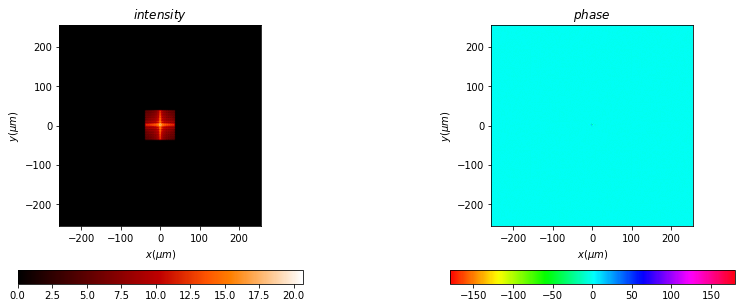

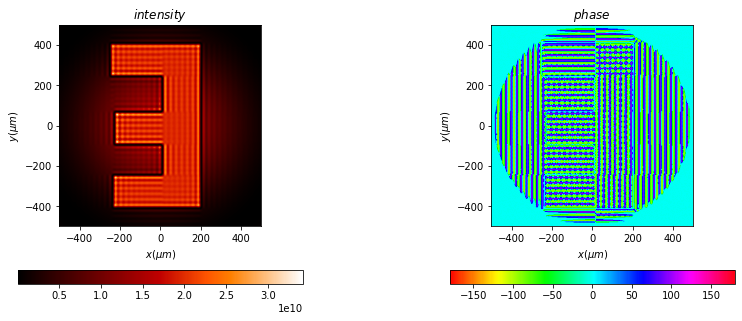

In [21]:
E_a_L1_Sq, E_a_L1_Sq_L2 = sim(E_a_L1, sq)
E_a_L1_Sq.draw(kind='field', logarithm=True)
E_a_L1_Sq_L2.draw(kind='field', logarithm=False)

### Vertical Slit

((<matplotlib.image.AxesImage at 0x218d4c9ba00>,
  <matplotlib.image.AxesImage at 0x218d83cf100>),
 None,
 None)

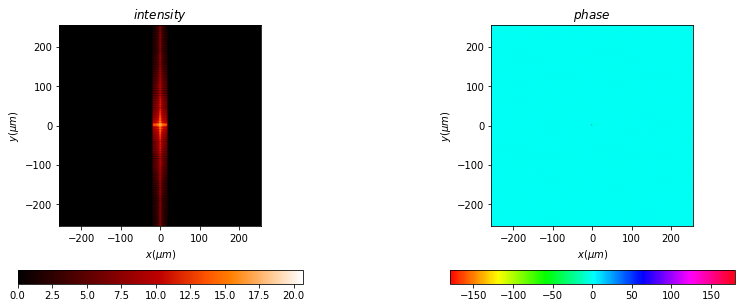

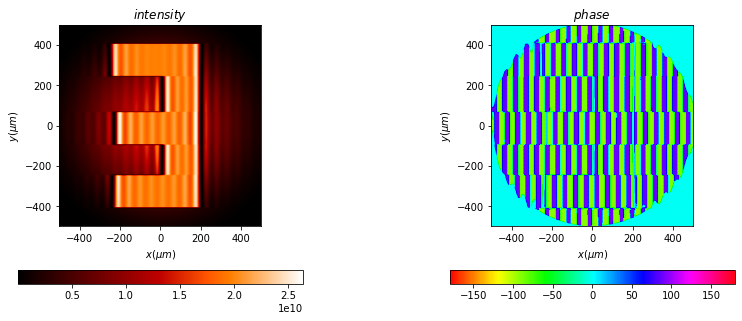

In [22]:
E_a_L1_Vert, E_a_L1_Vert_L2 = sim(E_a_L1, vert)
E_a_L1_Vert.draw(kind='field', logarithm=True)
E_a_L1_Vert_L2.draw(kind='field', logarithm=False)

### Horizontal Slit

((<matplotlib.image.AxesImage at 0x218d9d892b0>,
  <matplotlib.image.AxesImage at 0x218d9ded8e0>),
 None,
 None)

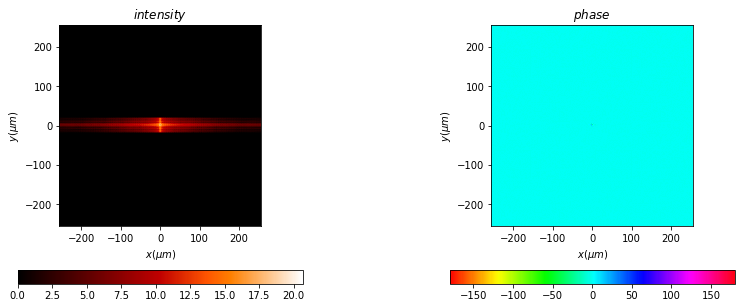

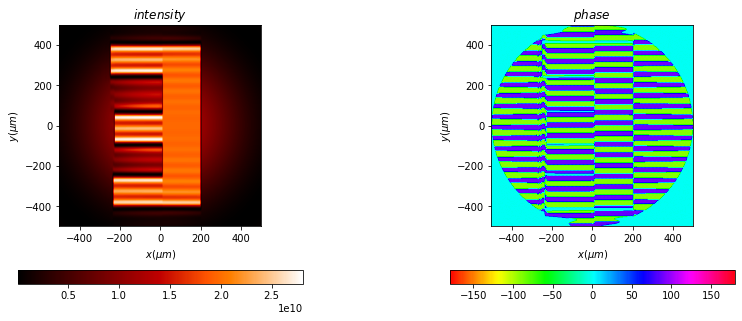

In [23]:
E_a_L1_Horiz, E_a_L1_Horiz_L2 = sim(E_a_L1, horiz)
E_a_L1_Horiz.draw(kind='field', logarithm=True)
E_a_L1_Horiz_L2.draw(kind='field', logarithm=False)

### Angled Slit

((<matplotlib.image.AxesImage at 0x218da856a30>,
  <matplotlib.image.AxesImage at 0x218dc584ca0>),
 None,
 None)

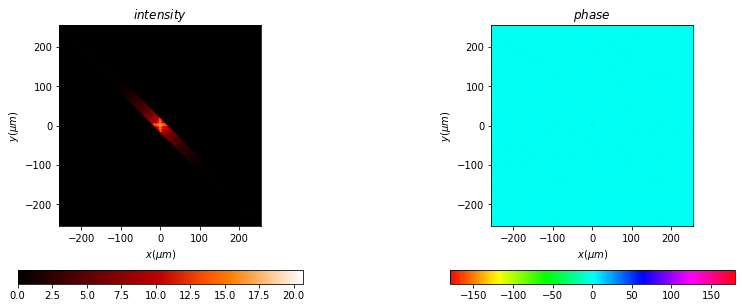

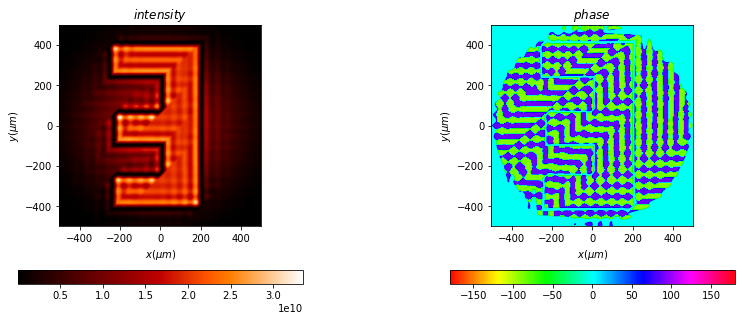

In [24]:
E_a_L1_Angled, E_a_L1_Angled_L2 = sim(E_a_L1, angled)
E_a_L1_Angled.draw(kind='field', logarithm=True)
E_a_L1_Angled_L2.draw(kind='field', logarithm=False)

### Square + Circle

((<matplotlib.image.AxesImage at 0x218df855e80>,
  <matplotlib.image.AxesImage at 0x218dc5e2970>),
 None,
 None)

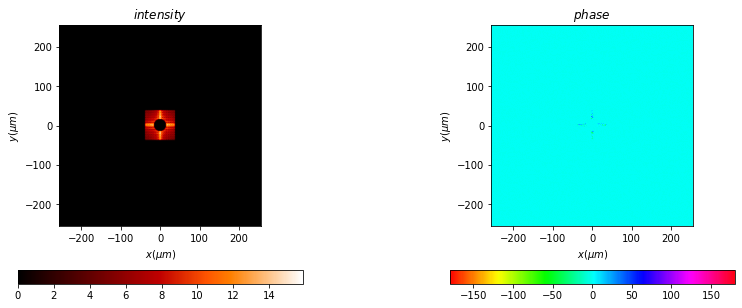

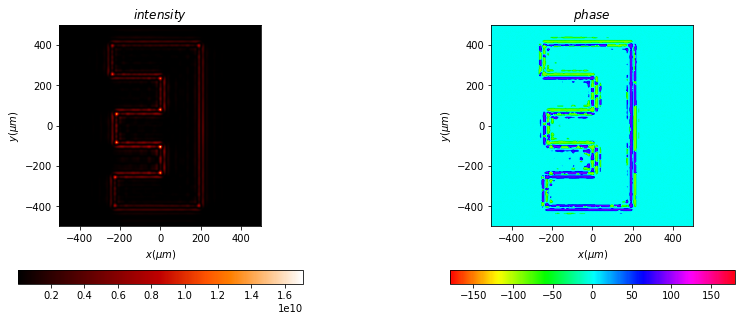

In [25]:
E_a_L1_SqCirc, E_a_L1_SqCirc_L2 = sim(E_a_L1, sqCirc)
E_a_L1_SqCirc.draw(kind='field', logarithm=True)
E_a_L1_SqCirc_L2.draw(kind='field', logarithm=False)

### Variable Slit Widths

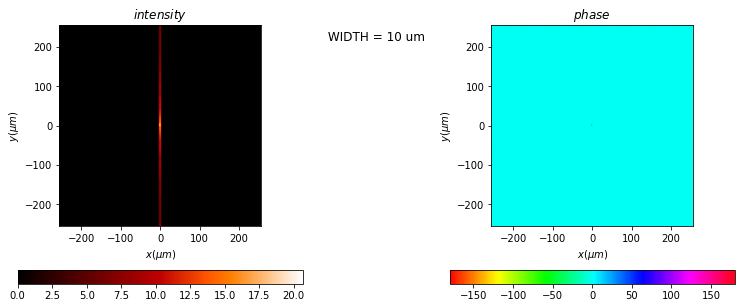

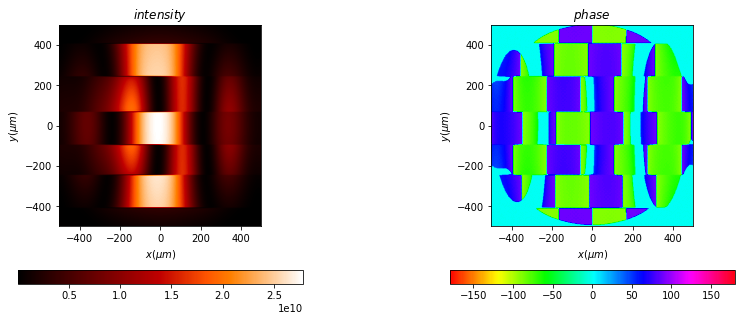

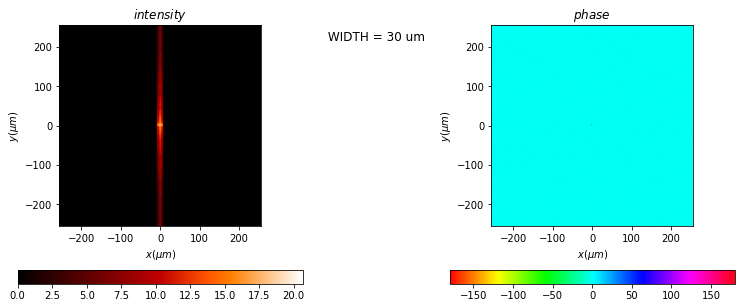

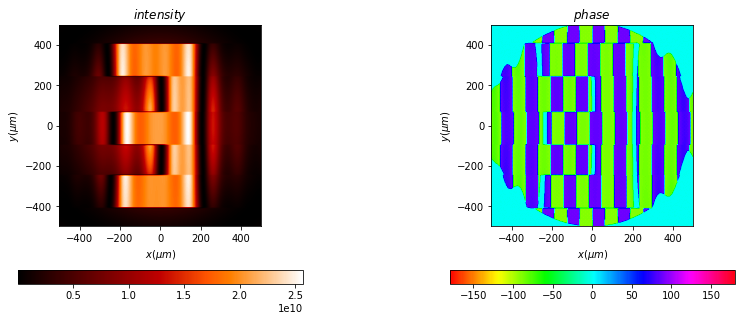

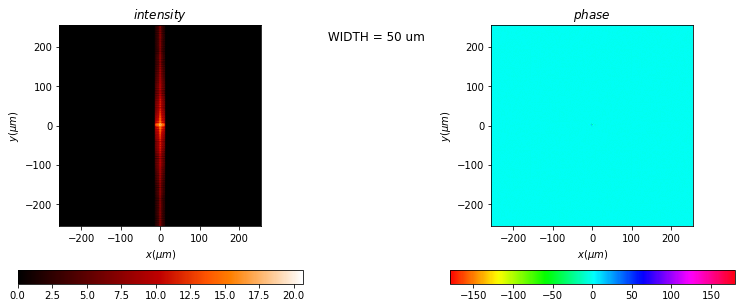

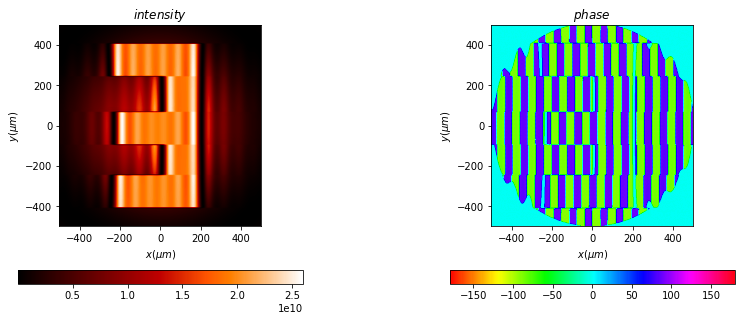

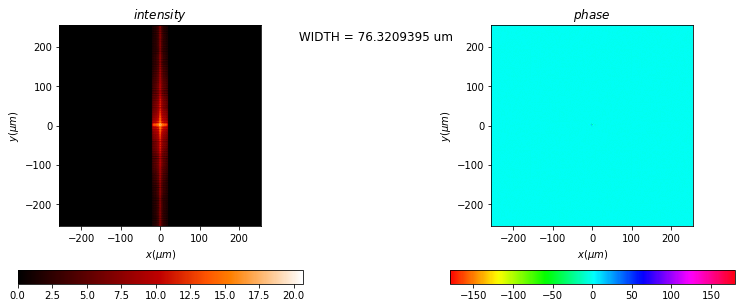

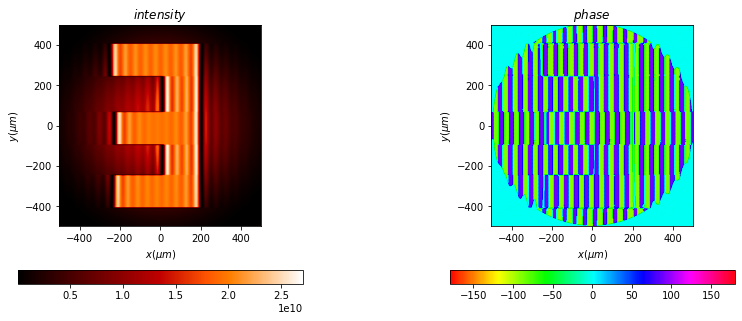

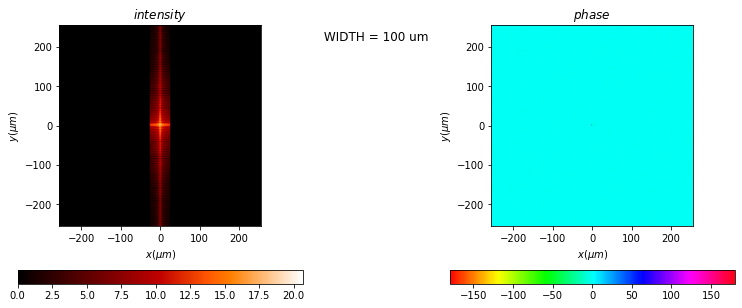

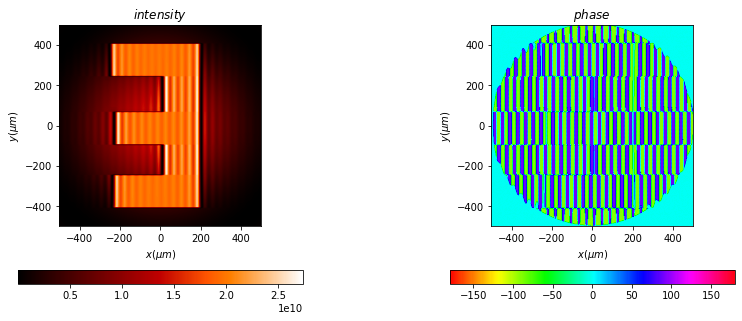

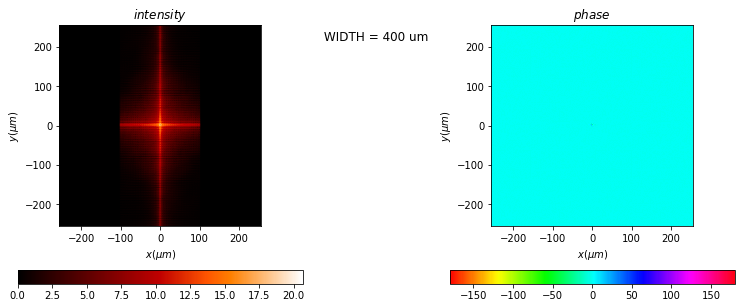

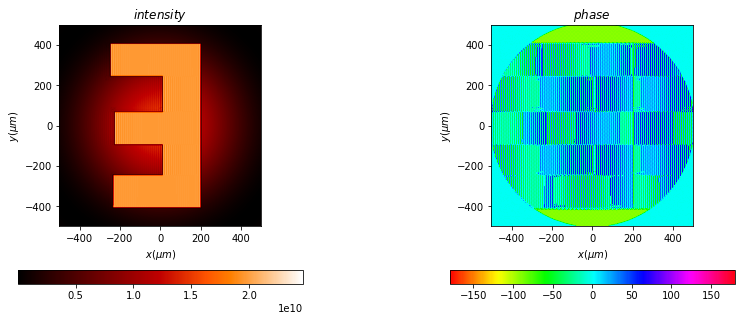

In [26]:
widths = [10, 30, 50, 76.3209395, 100, 400]  # in um
for width in widths:
    varSlit = Scalar_mask_XY(x0, y0, wavelength)
    varSlit.slit(
        x0=0 * um,
        size=width * um
    )

    E_a_L1_VarSlit, E_a_L1_VarSlit_L2 = sim(E_a_L1, varSlit)
    E_a_L1_VarSlit.draw(title=f" WIDTH = {width} um ", kind='field', logarithm=True)
    E_a_L1_VarSlit_L2.draw(kind='field', logarithm=False)

#### We can observe the "letter being assembled" from various modes, as higher frequencies are allowed to pass through.

### Mesh

((<matplotlib.image.AxesImage at 0x218e78d8fd0>,
  <matplotlib.image.AxesImage at 0x218e7b4e8b0>),
 None,
 None)

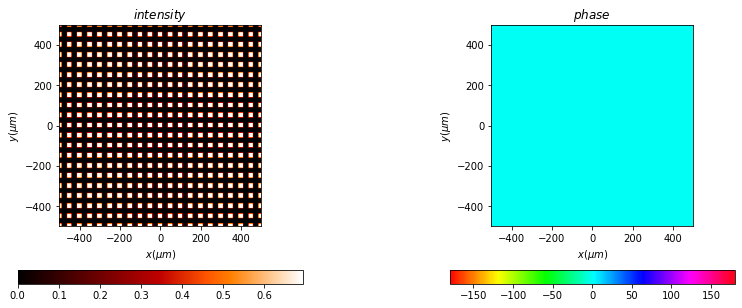

In [27]:
mesh = Scalar_mask_XY(x0, y0, wavelength)
mesh.grating_2D(
    period=50 * um,
    fill_factor=0.5,
    angle=0 * degrees
)

mesh.draw(kind='field', logarithm=True)

((<matplotlib.image.AxesImage at 0x218e91c9c70>,
  <matplotlib.image.AxesImage at 0x218e9234ee0>),
 None,
 None)

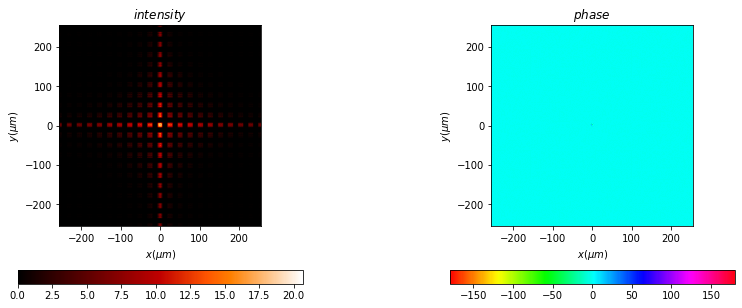

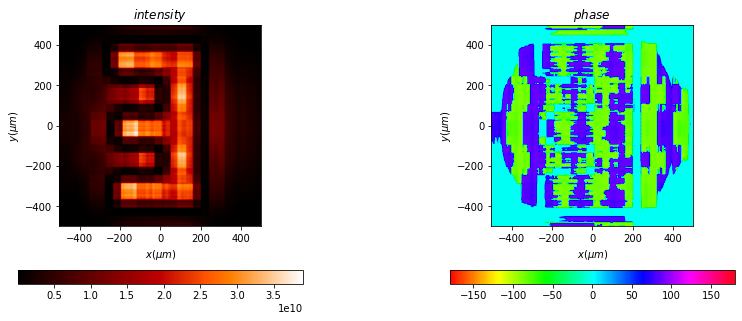

In [28]:
E_a_L1_Mesh, E_a_L1_Mesh_L2 = sim(E_a_L1, mesh)
E_a_L1_Mesh.draw(kind='field', logarithm=True)
E_a_L1_Mesh_L2.draw(kind='field', logarithm=False)

### One can obtain similar results with the "F" alphabet-mask.